In [1]:
#install necessary stuff
!pip install geopandas
!pip install sentinelsat
!pip install geojsonio

In [2]:
from sentinelsat.sentinel import read_geojson, geojson_to_wkt


#Test params
Query = 'Avelar'
Cloud = '[0,5]'
sort = 'sortParam=cloudCover&sortOrder=ascending'
Satelite = 'Sentinel2'
nIndex = 0
Tipo = 'TrueColor'
ProcessingLevel = 'LEVEL1C'
DataSet = 'ESA-DATASET'

#file geojson for the client land
geo = 'map_avelar.geojson'

#convert geojson for wkt for  API   query
geom = geojson_to_wkt(read_geojson(geo))


#query
URL = 'http://finder.creodias.eu/resto/api/collections/' + Satelite + '/search.json?maxRecords=10&processingLevel=' + ProcessingLevel + '&cloudCover=' + Cloud + '&geometry=' + geom + '&sortParam=startDate&sortOrder=descending&status=all&dataset=' + DataSet

import json, requests, os
products = json.loads(requests.get(URL).text)['features']
for product in products:
    print(product['properties'] ['productIdentifier'])
    
plik = products[nIndex]['properties'] ['productIdentifier']
plik




/eodata/Sentinel-2/MSI/L1C/2021/05/04/S2A_MSIL1C_20210504T112111_N0300_R037_T29TNE_20210504T133114.SAFE
/eodata/Sentinel-2/MSI/L1C/2021/04/04/S2A_MSIL1C_20210404T112111_N0300_R037_T29TNE_20210404T133105.SAFE
/eodata/Sentinel-2/MSI/L1C/2021/03/20/S2B_MSIL1C_20210320T112109_N0209_R037_T29TNE_20210320T123052.SAFE
/eodata/Sentinel-2/MSI/L1C/2021/03/15/S2A_MSIL1C_20210315T112111_N0209_R037_T29TNE_20210315T133629.SAFE
/eodata/Sentinel-2/MSI/L1C/2021/02/28/S2B_MSIL1C_20210228T112109_N0209_R037_T29TNE_20210228T133316.SAFE
/eodata/Sentinel-2/MSI/L1C/2021/02/13/S2A_MSIL1C_20210213T112151_N0209_R037_T29TNE_20210213T133358.SAFE
/eodata/Sentinel-2/MSI/L1C/2020/11/20/S2B_MSIL1C_20201120T112359_N0209_R037_T29TNE_20201120T122905.SAFE
/eodata/Sentinel-2/MSI/L1C/2020/10/11/S2B_MSIL1C_20201011T112119_N0209_R037_T29TNE_20201011T122752.SAFE
/eodata/Sentinel-2/MSI/L1C/2020/09/06/S2A_MSIL1C_20200906T112121_N0209_R037_T29TNE_20200906T133410.SAFE
/eodata/Sentinel-2/MSI/L1C/2020/09/01/S2B_MSIL1C_20200901T112119

'/eodata/Sentinel-2/MSI/L1C/2021/05/04/S2A_MSIL1C_20210504T112111_N0300_R037_T29TNE_20210504T133114.SAFE'

# select product and choose bands



In [3]:
import rasterio

path = plik + '/GRANULE' + '/' +os.listdir(plik + '/GRANULE')[0] + '/IMG_DATA'
if (os.path.isdir(path + '/' + sorted(os.listdir(path))[0])):
    var_apoio = path + '/' + sorted(os.listdir(pasth))[0]
    
band2 = rasterio.open(path + '/' + sorted(os.listdir(path))[1]) #azul
band3 = rasterio.open(path + '/' + sorted(os.listdir(path))[2]) #verde
band4 = rasterio.open(path + '/' + sorted(os.listdir(path))[3]) #red

path


'/eodata/Sentinel-2/MSI/L1C/2021/05/04/S2A_MSIL1C_20210504T112111_N0300_R037_T29TNE_20210504T133114.SAFE/GRANULE/L1C_T29TNE_A030636_20210504T112445/IMG_DATA'

## create geotiff

In [5]:
from rasterio import plot
import matplotlib.pyplot as plt

nome = "test_file"

trueColor = rasterio.open( nome + '.tiff','w',driver='Gtiff',
                          width=band4.width, height=band4.height,
                          count=3,
                          crs=band4.crs,
                          transform=band4.transform,
                          dtype=band4.dtypes[0]
                         )
trueColor.write(band2.read(1), 3) #blue 
trueColor.write(band3.read(1), 2) #green
trueColor.write(band4.read(1), 1) #red
trueColor.close()
os.path.isfile(nome + '.tiff')




True

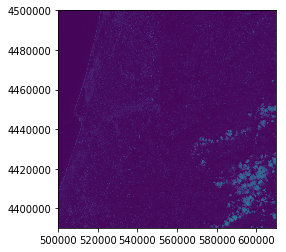

In [6]:
from rasterio.plot import show

fp = 'test_file.tiff'
img = rasterio.open(fp)
show (img)